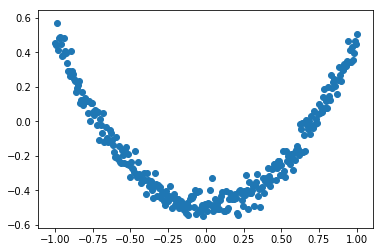

InvalidArgumentError: Shape [-1,1] has negative dimensions
	 [[Node: Placeholder_30 = Placeholder[dtype=DT_FLOAT, shape=[?,1], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder_30', defined at:
  File "F:\Users\Alec_zhang13\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "F:\Users\Alec_zhang13\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "F:\Users\Alec_zhang13\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "F:\Users\Alec_zhang13\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "F:\Users\Alec_zhang13\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "F:\Users\Alec_zhang13\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "F:\Users\Alec_zhang13\Anaconda3\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "F:\Users\Alec_zhang13\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "F:\Users\Alec_zhang13\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "F:\Users\Alec_zhang13\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "F:\Users\Alec_zhang13\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "F:\Users\Alec_zhang13\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "F:\Users\Alec_zhang13\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "F:\Users\Alec_zhang13\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "F:\Users\Alec_zhang13\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "F:\Users\Alec_zhang13\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "F:\Users\Alec_zhang13\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "F:\Users\Alec_zhang13\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "F:\Users\Alec_zhang13\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "F:\Users\Alec_zhang13\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-36-dcbba6812035>", line 29, in <module>
    xs = tf.placeholder(tf.float32, [None, 1])
  File "F:\Users\Alec_zhang13\Anaconda3\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1530, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "F:\Users\Alec_zhang13\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 1954, in _placeholder
    name=name)
  File "F:\Users\Alec_zhang13\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "F:\Users\Alec_zhang13\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "F:\Users\Alec_zhang13\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Shape [-1,1] has negative dimensions
	 [[Node: Placeholder_30 = Placeholder[dtype=DT_FLOAT, shape=[?,1], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [47]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def add_layer(inputs,in_size,out_size,activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size,out_size]))
    biases = tf.Variable(tf.zeros([1,out_size])+0.1)
    Wx_plus_b = tf.matmul(inputs,Weights)+biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

x_data = np.linspace(-1,1,300)[:,np.newaxis]
noise = np.random.normal(0,0.05,x_data.shape)
y_data = np.square(x_data)-0.5+noise

xs =tf.placeholder(tf.float32,[None,1])
ys = tf.placeholder(tf.float32,[None,1])

l1 = add_layer(xs,1,10,activation_function=tf.nn.relu)
perdiction = add_layer(l1,10,1,activation_function=None)

loss =tf.reduce_mean(tf.reduce_sum(tf.square(ys - perdiction), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data,y_data)
plt.ion()
plt.show()

for i in range(1000): 
    sess.run(train_step,feed_dict={xs:x_data,ys:y_data})
    if i % 50 == 0:
        #print(sess.run(loss,feed_dict={xs:x_data,ys:y_data}))
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        prediction_value = sess.run(prediction, feed_dict={xs: x_data})
        # plot the prediction
        lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
        plt.pause(1)


Instructions for updating:
Use `tf.global_variables_initializer` instead.
6.06154
0.0226748
0.0121556
0.00625915
0.00379449
0.00322788
0.00307671
0.00300157
0.00294643
0.00290455
0.00287308
0.00285226
0.00283508
0.00282188
0.00281099
0.00280058
0.00279159
0.00278207
0.00277461
0.00276881


Instructions for updating:
Use `tf.global_variables_initializer` instead.


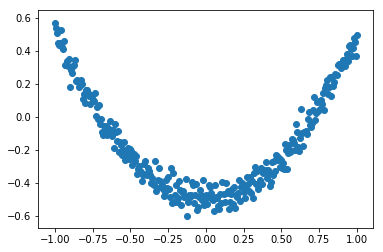

NameError: name 'time' is not defined

In [1]:
 

"""
Please note, this code is only for python 3+. If you are using python 2+, please modify the code accordingly.
"""
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

# Make up some real data
x_data = np.linspace(-1, 1, 300)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

##plt.scatter(x_data, y_data)
##plt.show()

# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])
# add hidden layer
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
# add output layer
prediction = add_layer(l1, 10, 1, activation_function=None)

# the error between prediciton and real data
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
# important step
init = tf.initialize_all_variables()
sess= tf.Session()
sess.run(init)

# plot the real data
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.ion()
plt.show()


for i in range(1000):
    # training
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
        # to visualize the result and improvement
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        prediction_value = sess.run(prediction, feed_dict={xs: x_data})
        # plot the prediction
        lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
        plt.pause(1)











